In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import glob
import math
from imutils.object_detection import non_max_suppression



In [43]:
img = cv2.imread("test2.jpg")
print(img.shape)
img = cv2.resize(img,(img.shape[1]*8,img.shape[0]*8))
plt.imshow(img)

(2116, 2822, 3)


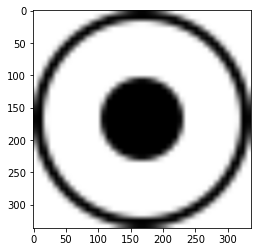

In [ ]:
template = cv2.imread("template.png")
template = cv2.resize(template,(template.shape[1]*8,template.shape[0]*8))

plt.imshow(template)
(tH, tW) = template.shape[:2]
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

[INFO] 675 matched locations *before* NMS
No of template matched locations 675


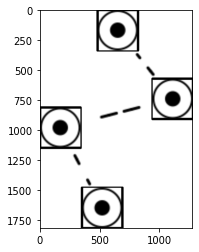

In [ ]:

result = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
(yCoords, xCoords) = np.where(result >= 0.8)
number_of_templates_matched = 0
clone = img.copy()
print("[INFO] {} matched locations *before* NMS".format(len(yCoords)))
for (x, y) in zip(xCoords, yCoords):
    	# draw the bounding box on the image
	cv2.rectangle(clone, (x, y), (x + tW, y + tH),
		(0), 1)
	number_of_templates_matched = number_of_templates_matched + 1

print("No of template matched locations",number_of_templates_matched)
plt.imshow(clone,cmap="gray")


[INFO] 4 matched locations *after* NMS
[(526, 1648), (170, 989), (1102, 749), (645, 177)] shape of image (1816, 1272)


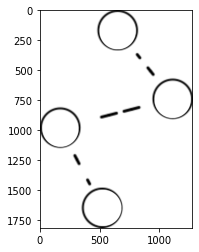

In [ ]:
rects = []
clone2 = img.copy()
# loop over the starting (x, y)-coordinates again
for (x, y) in zip(xCoords, yCoords):
	# update our list of rectangles
	rects.append((x, y, x + tW, y + tH))
# apply non-maxima suppression to the rectangles
pick = non_max_suppression(np.array(rects))
print("[INFO] {} matched locations *after* NMS".format(len(pick)))
# loop over the final bounding boxes
centers = [ ]
temp = ()
for (startX, startY, endX, endY) in pick:
	# draw the bounding box on the image
	# cv2.rectangle(clone2, (startX, startY), (endX, endY),
		# (0), 1)
	temp = (int((startX+endX)/2), int((startY+endY)/2))
	image = cv2.circle(clone2, temp, int(0.9*((endX-startX)/2)), (255), -1)
	centers.append(temp)

# show the output image
plt.imshow(clone2,cmap="gray")
print(centers,"shape of image",img.shape)

In [ ]:

center1 = centers[0]#i
center2 = centers[1]#j
x1 = center2[0]
y1 = center2[1]
x2 = center1[0]
y2 = center1[1]
print(center1,center2)
print(y2-y1)
pixels_in_line = []
rate = (y2-y1)/math.sqrt((x2-x1)**2+(y2-y1)**2)
print(rate)
if(x2>x1):

    for y in np.arange(y1,y2,rate):

        x = (y-y1)*(x2-x1)/(y2-y1) + x1 
        print(y,x)
        pixels_in_line.append(clone2[int(y)][int(x)])
        
else:

    for x in np.arange(x2,x1,rate):
        x = (y-y1)*(x2-x1)/(y2-y1) + x1 
    
        pixels_in_line.append(clone2[int(y)][int(x)])

(526, 1648) (170, 989)
659
0.8798272399376577
989.0 170.0
989.8798272399376 170.47529362278877
990.7596544798753 170.95058724557754
991.6394817198129 171.4258808683663
992.5193089597506 171.90117449115507
993.3991361996882 172.37646811394384
994.2789634396258 172.8517617367326
995.1587906795635 173.32705535952138
996.0386179195011 173.80234898231018
996.9184451594388 174.27764260509895
997.7982723993764 174.75293622788772
998.678099639314 175.22822985067648
999.5579268792517 175.70352347346525
1000.4377541191893 176.17881709625402
1001.317581359127 176.6541107190428
1002.1974085990646 177.12940434183156
1003.0772358390022 177.60469796462033
1003.9570630789399 178.0799915874091
1004.8368903188775 178.55528521019787
1005.7167175588152 179.03057883298663
1006.5965447987528 179.5058724557754
1007.4763720386904 179.98116607856417
1008.3561992786281 180.45645970135297
1009.2360265185657 180.93175332414174
1010.1158537585034 181.4070469469305
1010.995680998441 181.88234056971928
1011.87550823

In [ ]:
print(pixels_in_line)
threshold = 200
imp_data = []
flag = False
flag2 = True
for pixel in pixels_in_line:
    if(pixel<threshold and flag2):
        flag = True
        flag2 = False

    if(flag):
        imp_data.append(pixel)
flag = False
flag2 = True
imp_data1 = []
for pixel in reversed(imp_data):
    if(pixel<threshold and flag2):
        flag = True
        flag2 = False

    if(flag):
        imp_data1.append(pixel)
imp_data1.reverse()
print("\n\n\n",imp_data1)

[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 7, 2, 12, 35, 66, 90, 123, 123, 155, 179, 203, 224, 228, 237, 241, 245, 247, 252, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [ ]:

# perspective_images = []
# # (startX, startY, endX, endY)
# for i in range(len(pick)-1):

#     pts1 = np.float32([[pick[i][0],pick[i][3]],[pick[i][2],pick[i][1]],[pick[i+1][0],pick[i+1][3]],[pick[i+1][2],pick[i+1][1]]])
#     pts2 = np.float32([[0,0],[perspective_frame[0],0],[0,perspective_frame[1]],[perspective_frame[0],perspective_frame[1]]])
#     M = cv2.getPerspectiveTransform(pts1,pts2)
#     dst = cv2.warpPerspective(clone2,M,perspective_frame)
#     perspective_images.append(dst)
#     plt.figure()

#     plt.imshow(dst,cmap="gray")
  

# plt.show()


In [ ]:
mag = math.sqrt((x2-x1)**2+(y2-y1)**2)
line = (((x2-x1))/mag,((y2-y1))/mag)
perpendicular = (line[0],-1*line[1])


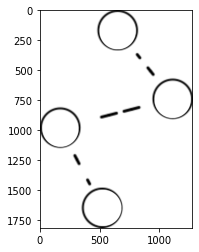

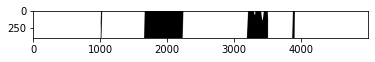

In [ ]:
width = 1

plt.imshow(clone2,cmap="gray")
perspective_frame = (5000,400)

point1 = [x1+width*perpendicular[0],y1+width*perpendicular[1]]
point2 = [x2+width*perpendicular[0],y2+width*perpendicular[1]]
point3 = [x1-width*perpendicular[0],y1-width*perpendicular[1]]
point4 = [x2-width*perpendicular[0],y2-width*perpendicular[1]]


points = np.float32([point1,point2,point3,point4])
paper = np.float32([[0,0],[perspective_frame[0],0],[0,perspective_frame[1]],[perspective_frame[0],perspective_frame[1]]])
M = cv2.getPerspectiveTransform(points,paper)
dst = cv2.warpPerspective(clone2,M,perspective_frame)
plt.figure()
# print(points,clone2)
_,dst = cv2.threshold(dst,20,255,cv2.THRESH_BINARY)
plt.imshow(dst,cmap="gray")
# print(dst)

In [ ]:
code = dst[0]
section = len(code)/8
print(dst[0])

[255 255 255 ... 255 255 255]


In [ ]:
for i  in range(len(code)-1):
    if(code[i] ==0 and code[i+1] == 255):
        code = code[i+1:len(code)-1]
        break
    


In [ ]:
for i in range(len(code)-1, 0, -1):
    if(code[i] == 0 and code[i-1] == 255):
        code = code[0:i-1]
        break
    

In [ ]:
print(code)

[255 255 255 ... 255 255 255]


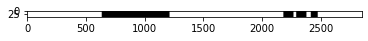

In [ ]:
final_code = [code]*50
plt.imshow(final_code,cmap="gray")

In [ ]:
step_size = int(len(code)/8)
ans =[]
for i in range(8):
    temp = np.mean(code[i*step_size:(i+1)*step_size])
    ans.append(temp)



In [ ]:
print(ans)

[255.0, 201.1267605633803, 0.0, 150.1267605633803, 255.0, 255.0, 88.35211267605634, 255.0]


In [ ]:
decoded = ""
for i in ans:
    if(i<150):
        decoded+=("1")
    else:
        decoded+=("0")
print(decoded)


00100010


In [ ]:
ascii_string = ""


an_integer = int(decoded, 2)



ascii_character = chr(an_integer)



ascii_string += ascii_character



print(ascii_string)

"


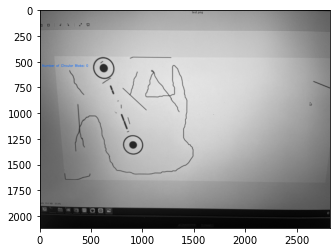

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('test2.jpg', 0)

# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = True
params.minConvexity = 0.2
	
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
	
# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255),
						cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550),
			cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
plt.imshow(blobs,cmap='gray')

